In [2]:
import pandas as pd
import glob

In [3]:
ldap_csvs = glob.glob('*.csv')

In [4]:
dfs = []

for ldap in ldap_csvs:
    
    file_name = ldap
    date = file_name.split('.')[0]
    df_temp = pd.read_csv(file_name)
    df_temp['date'] = date
    dfs.append(df_temp)

In [5]:
df_ldap = pd.concat(dfs)

In [6]:
df_ldap.columns

Index(['employee_name', 'user_id', 'email', 'role', 'business_unit',
       'functional_unit', 'department', 'team', 'supervisor', 'date'],
      dtype='object')

In [7]:
df_ldap.nunique()

employee_name      1000
user_id            1000
email              1000
role                 41
business_unit         1
functional_unit       6
department           22
team                 37
supervisor           66
date                 18
dtype: int64

NameError: name 'fig' is not defined

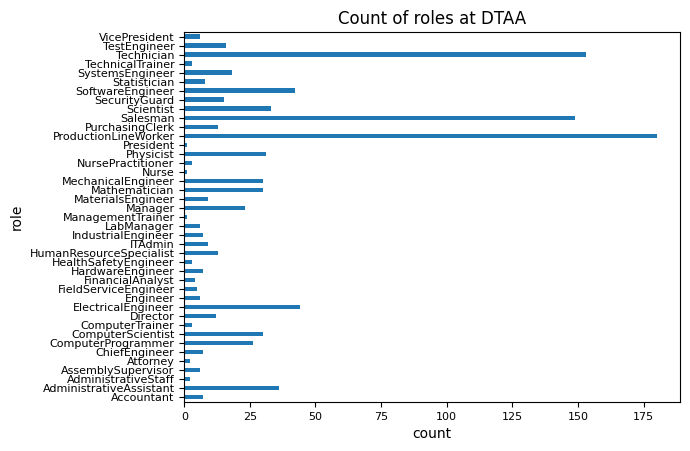

In [8]:
import matplotlib.pyplot as plt
barh_roles = df_ldap[df_ldap['date'] == '2009-12'].groupby('role').count()['employee_name'].plot.barh(title='Count of roles at DTAA', fontsize=8, xlabel='count')
barh_rolesFig = fig.get_figure()

barh_rolesFig.savefig('roles.png', bbox_inches='tight')


In [9]:
# understand if the admins of a company remain with the company throughout the duration of the data set
df_ldap[df_ldap['role'] == 'ITAdmin'][['user_id','date']].groupby('date').count()

,user_id
date,
2009-12,9
2010-01,9
2010-02,9
2010-03,9
2010-04,9
2010-05,9
2010-06,8
2010-07,8
2010-08,8


In [10]:
# calculate the number of users within the data set
df_numLdap = df_ldap.groupby('user_id').count()['date'].to_frame()

In [11]:
# find the users who are not within all files of ldap
df_numLdap[df_numLdap['date'] != 18]

,date
user_id,
ABM0173,13
ARB0002,11
ASO0737,12
ASS0569,12
ASW0536,3
...,...
WCC0009,17
WSP0210,6
XBB0890,15


In [12]:
# bv string minumum, find those employee of the 1000 that did not start with the company
startDates = df_ldap.groupby('user_id')['date'].min()

startDates[startDates != '2009-12']

Series([], Name: date, dtype: object)

In [13]:
# validate series length
startDates

user_id
AAC0070    2009-12
AAP0946    2009-12
AAR0716    2009-12
AAS0850    2009-12
ABG0865    2009-12
            ...   
ZKC0722    2009-12
ZLB0620    2009-12
ZLW0169    2009-12
ZNS0213    2009-12
ZSP0972    2009-12
Name: date, Length: 1000, dtype: object

In [14]:
# find those employes that have left the employment of the company by string max 
endDates = df_ldap.groupby('user_id')['date'].max()
endDates[endDates != '2011-05']

user_id
ABM0173    2010-12
ARB0002    2010-10
ASO0737    2010-11
ASS0569    2010-11
ASW0536    2010-02
            ...   
WCC0009    2011-04
WSP0210    2010-05
XBB0890    2011-02
XYW0563    2011-01
ZER0363    2010-02
Name: date, Length: 103, dtype: object

NameError: name 'fig' is not defined

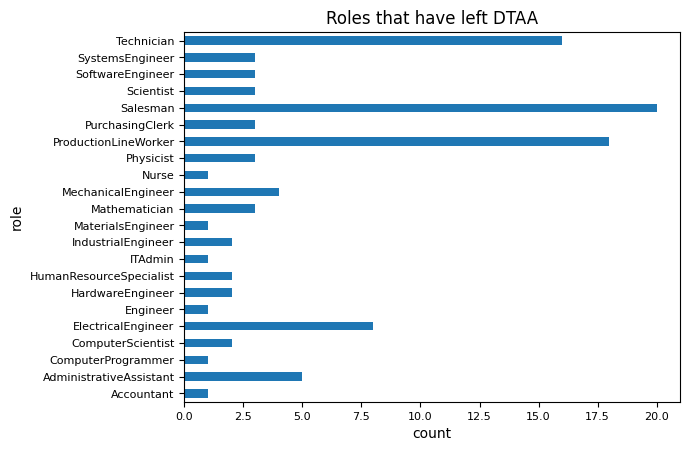

In [15]:
df_rolesLeaving = df_ldap.groupby('user_id')[['date','role']].max()
barh_rolesLeaving = df_rolesLeaving[df_rolesLeaving['date'] != '2011-05'].groupby('role').count().plot.barh(title='Roles that have left DTAA', fontsize=8, xlabel='count', legend=False)
barh_rolesLeavingsFig = fig.get_figure()

barh_rolesLeavingsFig.savefig('rolesLeaving.png', bbox_inches='tight')

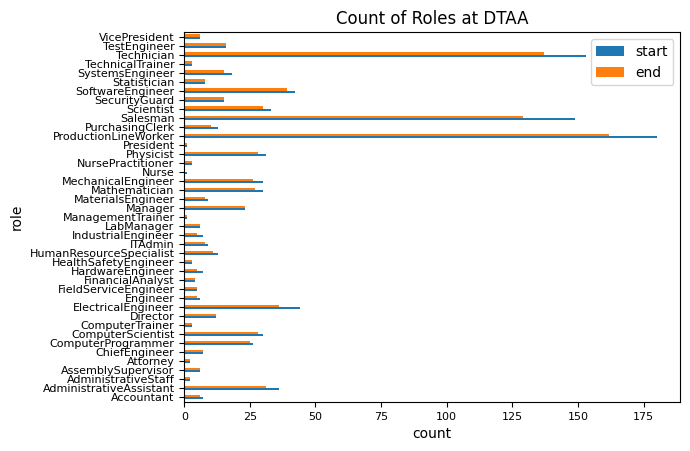

In [16]:
df_start = df_ldap[df_ldap['date'] == '2009-12'].groupby('role').count()['employee_name'].to_frame().rename(columns={'employee_name':'start'})
df_end = df_ldap[df_ldap['date'] == '2011-05'].groupby('role').count()['employee_name'].to_frame().rename(columns={'employee_name':'end'})
barh_roleStats = df_start.join(df_end).plot.barh(title='Count of Roles at DTAA', fontsize=8, xlabel='count')

barh_roleStats.figure.savefig('rolesStats.png', bbox_inches='tight')


In [17]:
df_ldap.apply(lambda col: col.nunique())

employee_name      1000
user_id            1000
email              1000
role                 41
business_unit         1
functional_unit       6
department           22
team                 37
supervisor           66
date                 18
dtype: int64

In [20]:
# check to see if anybody changed roles
df_numRole = df_ldap.groupby('user_id').nunique()['role'].to_frame()
df_numRole[df_numRole['role'] != 1]

,role
user_id,


In [21]:
# check to see if there was a supervisor change
df_numSupervisor = df_ldap.groupby('user_id').nunique()['supervisor'].to_frame()
df_numSupervisor[df_numSupervisor['supervisor'] != 1]

,supervisor
user_id,
KTG0001,0


In [22]:
# find which users have left and those users that are still around
import numpy as np

allUsers = df_ldap['user_id'].unique()

for month in df_ldap['date'].unique():
    print(month)
    monthUsers = df_ldap[df_ldap['date'] == month]['user_id']
    print(len(monthUsers))
    
    if month == '2009-12':
        prevUsers = monthUsers
    
    print('users gone = ', np.setdiff1d(prevUsers, monthUsers))
    print('new users = ', np.setdiff1d(monthUsers, prevUsers))

    prevUsers = monthUsers

2009-12
1000
users gone =  []
new users =  []
2010-01
1000
users gone =  []
new users =  []
2010-02
993
users gone =  ['BPE0219' 'EPP0584' 'GVC0621' 'IMB0459' 'LKH0870' 'PAM0615' 'TJB0250']
new users =  []
2010-03
984
users gone =  ['ASW0536' 'CGH0679' 'CIL0124' 'DHH0260' 'JDJ0017' 'KBC0531' 'MPB0376'
 'OSB0976' 'ZER0363']
new users =  []
2010-04
979
users gone =  ['BLM0868' 'DCH0627' 'KTC0053' 'PTM0966' 'RHM0081']
new users =  []
2010-05
973
users gone =  ['DZJ0261' 'GGG0825' 'HAC0651' 'HRL0797' 'RDC0283' 'SNL0096']
new users =  []
2010-06
966
users gone =  ['CCO0065' 'GHG0667' 'IQW0294' 'KAK0992' 'PIB0855' 'SKC0670' 'WSP0210']
new users =  []
2010-07
962
users gone =  ['CSF0929' 'LCD0715' 'LRL0873' 'PAS0349']
new users =  []
2010-08
959
users gone =  ['JAL0281' 'NPB0217' 'PJE0714']
new users =  []
2010-09
952
users gone =  ['CCD0463' 'CCH0959' 'DSL0441' 'JQV0922' 'KHC0465' 'LKF0701' 'MJM0080']
new users =  []
2010-10
944
users gone =  ['DBM0279' 'DHB0696' 'FKR0134' 'HMD0974' 'HMW0274

In [23]:
df_numMonthsEmployed = df_ldap.groupby('user_id')['date'].count()

In [24]:
df_numMonthsEmployed.to_pickle('numMonthsEmployed.pkl')

In [28]:
df_userRole = df_ldap[['user_id', 'role']]
df_userRole.to_pickle('userRole.pkl')

In [18]:
df_ldap.to_pickle('ldap.pkl')

In [149]:
#df_temp = df_ldap.groupby(['email']).nunique()['user_id'].to_frame()
#df_temp[df_temp['user_id'] > 1]
# there are no user_id with more than 1 email
df_emailToUser_id = df_ldap[['user_id','email']].drop_duplicates().to_pickle('emailToUser_id.pkl')

In [119]:
df_ldap

,employee_name,user_id,email,role,business_unit,functional_unit,department,team,supervisor,date
0,Macey Colleen Nash,MCN0973,Macey.Colleen.Nash@dtaa.com,ElectricalEngineer,1,3 - Manufacturing,2 - ManufacturingEngineering,NaN,Ann Hannah Dickerson,2009-12
1,Nelle Sharon Cherry,NSC0622,Nelle.Sharon.Cherry@dtaa.com,Technician,1,5 - SalesAndMarketing,3 - FieldService,3 - RegionalFieldService,Amethyst Suki Norris,2009-12
2,Kathleen Audrey Vargas,KAV0428,Kathleen.Audrey.Vargas@dtaa.com,ProductionLineWorker,1,3 - Manufacturing,3 - Assembly,2 - AssemblyDept,Brenna Martha Russell,2009-12
3,Adrienne Joelle Mclean,AJM0772,Adrienne.Joelle.Mclean@dtaa.com,Scientist,1,2 - ResearchAndEngineering,1 - Research,5 - Lab,Emmanuel Casey Wiggins,2009-12
4,Nicole Maris Valentine,NMV0507,Nicole.Maris.Valentine@dtaa.com,Manager,1,5 - SalesAndMarketing,2 - Sales,3 - RegionalSales,Perry Reese Morton,2009-12
...,...,...,...,...,...,...,...,...,...,...
892,Lucy Anika Valenzuela,LAV0312,Lucy.Anika.Valenzuela@dtaa.com,Salesman,1,5 - SalesAndMarketing,2 - Sales,1 - RegionalSales,Hanna Miranda Lindsay,2011-05
893,Vaughan Emery Paul,VEP0043,Vaughan.Emery.Paul@dtaa.com,Director,1,2 - ResearchAndEngineering,2 - SoftwareManagement,NaN,Clementine April Juarez,2011-05
894,Benedict Ivan Rowe,BIR0613,Benedict.Ivan.Rowe@dtaa.com,Technician,1,5 - SalesAndMarketing,3 - FieldService,3 - RegionalFieldService,Amethyst Suki Norris,2011-05
895,Giacomo Russell Moreno,GRM0263,Giacomo.Russell.Moreno@dtaa.com,ComputerScientist,1,2 - ResearchAndEngineering,3 - Engineering,4 - SystemsEngineering,Evan Bevis Colon,2011-05


In [125]:
df_roleCount = df_ldap.groupby(['role','date']).count()['employee_name'].reset_index().rename(columns={'employee_name':'countRole'})
df_roleCount['date'] = df_roleCount.apply(lambda x: x['date'].replace('-',''), axis=1)
df_roleCount['maxRole'] = df_roleCount.groupby(['role'])['countRole'].transform('max')
df_roleCount['delta'] = df_roleCount['maxRole'] - df_roleCount['countRole']




In [127]:
df_roleCount[df_roleCount['delta'] > 0]

,role,date,countRole,maxRole,delta
12,Accountant,201012,6,7,1
13,Accountant,201101,6,7,1
14,Accountant,201102,6,7,1
15,Accountant,201103,6,7,1
16,Accountant,201104,6,7,1
...,...,...,...,...,...
691,Technician,201101,140,153,13
692,Technician,201102,139,153,14
693,Technician,201103,139,153,14
694,Technician,201104,138,153,15


In [128]:
df_dates = pd.date_range('1/1/2010', '5/31/2011').to_frame()
df_dates[0] = df_dates[0].dt.strftime('%Y%m%d')
df_dates['yearMonth'] = df_dates[0].apply(lambda x: x[0:6])
df_dates = df_dates.reset_index()
# df_dates.set_index('yearMonth')
for role in df_roleCount['role'].unique():
    df_dates[role] = 0

df_dates.head()

,index,0,yearMonth,Accountant,AdministrativeAssistant,AdministrativeStaff,AssemblySupervisor,Attorney,ChiefEngineer,ComputerProgrammer,...,Salesman,Scientist,SecurityGuard,SoftwareEngineer,Statistician,SystemsEngineer,TechnicalTrainer,Technician,TestEngineer,VicePresident
0,2010-01-01,20100101,201001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010-01-02,20100102,201001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010-01-03,20100103,201001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-01-04,20100104,201001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010-01-05,20100105,201001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
for row in df_roleCount.iterrows():
    role = row[1]['role']
    date = row[1]['date']
    delta = row[1]['delta']
    rows = df_dates.index[df_dates['yearMonth'] == date].tolist()
    df_dates.loc[rows, role] = delta
    

In [135]:
df_dates = df_dates.rename(columns={0:'dateString'})
df_dates

,index,dateString,yearMonth,Accountant,AdministrativeAssistant,AdministrativeStaff,AssemblySupervisor,Attorney,ChiefEngineer,ComputerProgrammer,...,Salesman,Scientist,SecurityGuard,SoftwareEngineer,Statistician,SystemsEngineer,TechnicalTrainer,Technician,TestEngineer,VicePresident
0,2010-01-01,20100101,201001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2010-01-02,20100102,201001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010-01-03,20100103,201001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-01-04,20100104,201001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2010-01-05,20100105,201001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,2011-05-27,20110527,201105,1,5,0,0,0,0,1,...,20,3,0,3,0,3,0,16,0,0
512,2011-05-28,20110528,201105,1,5,0,0,0,0,1,...,20,3,0,3,0,3,0,16,0,0
513,2011-05-29,20110529,201105,1,5,0,0,0,0,1,...,20,3,0,3,0,3,0,16,0,0
514,2011-05-30,20110530,201105,1,5,0,0,0,0,1,...,20,3,0,3,0,3,0,16,0,0


In [136]:
df_dates.to_pickle('./changeRoles.pkl')